# DummyRegressor

O **DummyRegressor** do Scikit-Learn é uma ferramenta simples, mas útil, que serve como um benchmark para avaliar o desempenho de modelos de regressão. Ele cria previsões baseadas em estratégias muito básicas, sem tentar capturar nenhum padrão nos dados. O objetivo principal do DummyRegressor é fornecer uma linha de base para comparação, ajudando a determinar se um modelo mais complexo realmente agrega valor em relação a essas previsões triviais.

### Como Funciona o DummyRegressor

O DummyRegressor gera previsões com base em diferentes estratégias pré-definidas. As principais estratégias disponíveis incluem:

1. **`mean`**:
   - O DummyRegressor prevê o valor médio das observações do conjunto de treinamento para todas as previsões.
   - **Uso**: Esta é a estratégia mais comum e é usada para avaliar se um modelo mais sofisticado consegue superar uma simples média dos dados.

2. **`median`**:
   - Similar à estratégia `mean`, mas usa a mediana das observações do conjunto de treinamento para todas as previsões.
   - **Uso**: Útil em situações onde a mediana é uma medida central mais representativa, como em dados com outliers significativos.

3. **`quantile`**:
   - Prevê um determinado quantil das observações do conjunto de treinamento. Por exemplo, se configurado para o 50º percentil, ele se comporta como a estratégia `median`.
   - **Uso**: Pode ser usado em situações onde é relevante prever um valor específico dentro da distribuição dos dados.

4. **`constant`**:
   - O DummyRegressor prevê um valor constante fornecido pelo usuário.
   - **Uso**: Útil para testes específicos, onde se deseja comparar o modelo com um valor fixo que faça sentido no contexto do problema.

Ao construir um modelo de regressão, o desempenho do modelo deve ser comparado a um benchmark para garantir que ele esteja realmente capturando padrões úteis nos dados. O DummyRegressor serve como esse benchmark. Se o seu modelo não consegue superar o DummyRegressor (por exemplo, a estratégia `mean`), isso indica que o modelo pode estar subajustado (underfitting) ou que os dados não têm informações suficientes para gerar previsões melhores.

### Vantagens e Limitações

**Vantagens**:
- **Simplicidade**: O DummyRegressor é extremamente simples de implementar e interpretar, tornando-o uma ferramenta rápida para benchmarking.
- **Benchmarking Claro**: Fornece uma linha de base clara que modelos mais complexos devem superar, ajudando a identificar problemas como overfitting ou underfitting.
- **Uso Flexível**: Suporta várias estratégias, permitindo que seja adaptado a diferentes contextos e necessidades específicas de benchmarking.

**Limitações**:
- **Previsões Triviais**: Como o DummyRegressor não tenta aprender nada sobre os dados, suas previsões são triviais e não capturam nenhuma estrutura ou padrão subjacente.
- **Aplicação Limitada**: Não é adequado para uso em produção, já que seu propósito é apenas comparar com modelos mais sofisticados.


https://scikit-learn.org/stable/modules/generated/sklearn.dummy.DummyRegressor.html

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

from sklearn.dummy import DummyRegressor
from sklearn.linear_model import LinearRegression

from src.config import DADOS_TRATADOS
from src.modelos import organiza_resultados, treinar_e_validar_modelo_regressao

sns.set_theme(palette="bright")

RANDOM_STATE = 42

In [2]:
df = pd.read_parquet(DADOS_TRATADOS)

df.head()

,idade,sexo,imc,pressao_media,colesterol_total,ldl,hdl,colesterol_hdl,triglicerides,glicose,target
0,59,2,32.099998,101.0,157,93.199997,38.0,4.0,4.8598,87,151
1,48,1,21.600000,87.0,183,103.199997,70.0,3.0,3.8918,69,75
2,72,2,30.500000,93.0,156,93.599998,41.0,4.0,4.6728,85,141
3,24,1,25.299999,84.0,198,131.399994,40.0,5.0,4.8903,89,206
4,50,1,23.000000,101.0,192,125.400002,52.0,4.0,4.2905,80,135


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 442 entries, 0 to 441
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   idade             442 non-null    int8   
 1   sexo              442 non-null    int8   
 2   imc               442 non-null    float32
 3   pressao_media     442 non-null    float32
 4   colesterol_total  442 non-null    int16  
 5   ldl               442 non-null    float32
 6   hdl               442 non-null    float32
 7   colesterol_hdl    442 non-null    float32
 8   triglicerides     442 non-null    float32
 9   glicose           442 non-null    int8   
 10  target            442 non-null    int16  
dtypes: float32(6), int16(2), int8(3)
memory usage: 13.5 KB


In [4]:
X = df.drop(columns="target")
y = df["target"]

In [5]:
regressors = {
    "DummyRegressor": DummyRegressor(strategy="mean"),
    "LinearRegression": LinearRegression(),
}

resultados = {
    nome_modelo: treinar_e_validar_modelo_regressao(X, y, regressor)
    for nome_modelo, regressor in regressors.items()
}

In [6]:
resultados

{'DummyRegressor': {'fit_time': array([0.0009973 , 0.        , 0.        , 0.00101113, 0.        ]),
  'score_time': array([0.00102234, 0.00107288, 0.00133133, 0.00099874, 0.00112152]),
  'test_r2': array([-0.01196298, -0.02697753, -0.01530397, -0.00021233, -0.04231598]),
  'test_neg_mean_absolute_error': array([-64.00646147, -70.57793551, -59.82954545, -70.05392912,
         -65.42565485]),
  'test_neg_root_mean_squared_error': array([-73.22249284, -80.04318688, -74.33859714, -82.04745226,
         -76.3152967 ])},
 'LinearRegression': {'fit_time': array([0.01514053, 0.00200009, 0.00250769, 0.00200009, 0.00200009]),
  'score_time': array([0.0020051 , 0.00199986, 0.00099993, 0.00199986, 0.00199986]),
  'test_r2': array([0.45260245, 0.57320023, 0.3914482 , 0.5842889 , 0.39081174]),
  'test_neg_mean_absolute_error': array([-42.7940979 , -41.5825882 , -47.22330093, -42.12234879,
         -47.62636948]),
  'test_neg_root_mean_squared_error': array([-53.85346222, -51.60074997, -57.55261993,

In [7]:
df_resultados = organiza_resultados(resultados)

df_resultados

,model,fit_time,score_time,test_r2,test_neg_mean_absolute_error,test_neg_root_mean_squared_error,time_seconds
0,DummyRegressor,0.000997,0.001022,-0.011963,-64.006461,-73.222493,0.00202
1,DummyRegressor,0.0,0.001073,-0.026978,-70.577936,-80.043187,0.001073
2,DummyRegressor,0.0,0.001331,-0.015304,-59.829545,-74.338597,0.001331
3,DummyRegressor,0.001011,0.000999,-0.000212,-70.053929,-82.047452,0.00201
4,DummyRegressor,0.0,0.001122,-0.042316,-65.425655,-76.315297,0.001122
5,LinearRegression,0.015141,0.002005,0.452602,-42.794098,-53.853462,0.017146
6,LinearRegression,0.002,0.002,0.5732,-41.582588,-51.60075,0.004
7,LinearRegression,0.002508,0.001,0.391448,-47.223301,-57.55262,0.003508
8,LinearRegression,0.002,0.002,0.584289,-42.122349,-52.895023,0.004
9,LinearRegression,0.002,0.002,0.390812,-47.626369,-58.34285,0.004


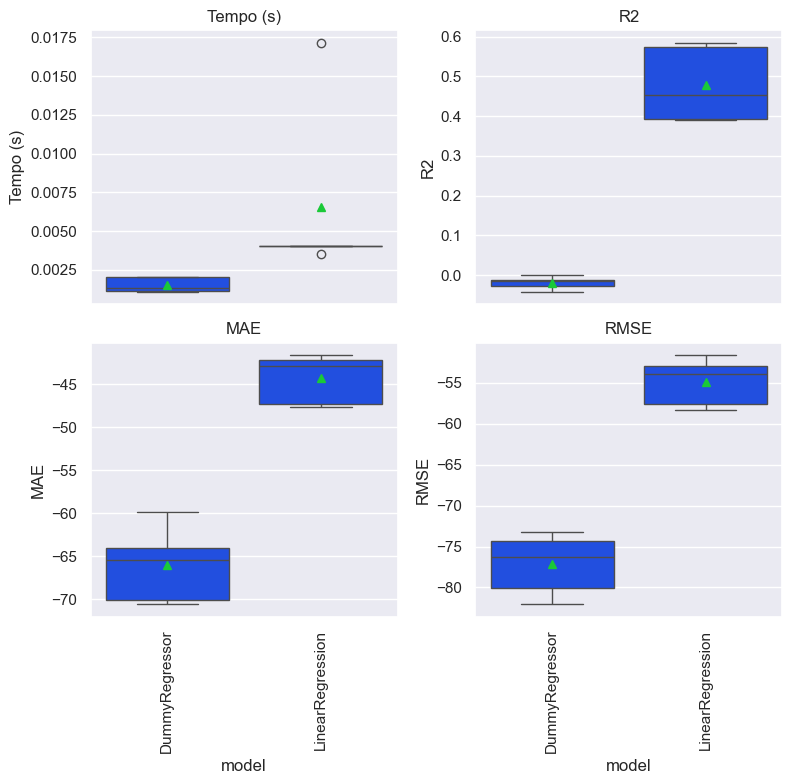

In [8]:
fig, axs = plt.subplots(2, 2, figsize=(8, 8), sharex=True)

comparar_metricas = [
    "time_seconds",
    "test_r2",
    "test_neg_mean_absolute_error",
    "test_neg_root_mean_squared_error",
]

nomes_metricas = [
    "Tempo (s)",
    "R2",
    "MAE",
    "RMSE"
]

for ax, metrica, nome in zip(axs.flatten(), comparar_metricas, nomes_metricas):
    sns.boxplot(
        x="model",
        y=metrica,
        data=df_resultados,
        ax=ax,
        showmeans=True
    )
    ax.set_title(nome)
    ax.set_ylabel(nome)
    ax.tick_params(axis="x", rotation=90)

plt.tight_layout()
plt.show()